In [48]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

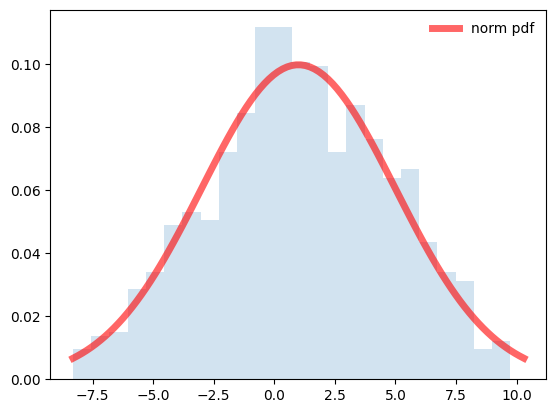

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 1.1027599509054702
Sample variance: 15.93987420675268


In [64]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

> Notes:
> - `norm` represent a normal continuous random variable
> - `loc` specifies the mean, `scale` specifies the standard deviation
> - `pdf` represents the probability density function
> - `cdf`is cumulative distribution function.
> - `ppf` is inverse of cdf

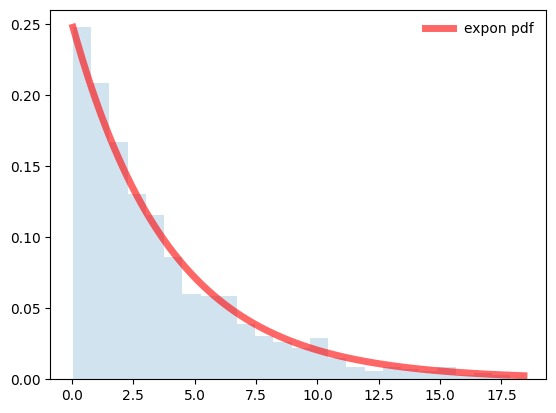

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.8746320614953733
Sample variance: 17.513071568763788


In [50]:
#Exponential
#here goes your code
rv_expon = expon(scale=4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: expon

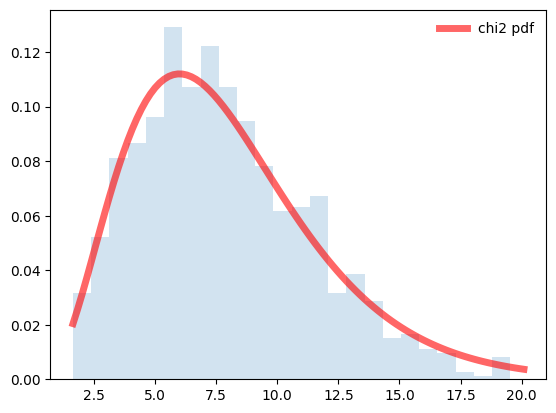

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.069556283388591
Sample variance: 16.137245712680315


In [51]:
#chi2
#here goes your code
rv_chi2 = chi2(df=8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: chi2

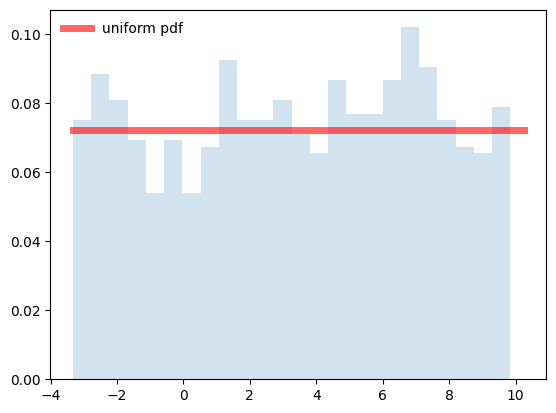

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.5345204723433428
Sample variance: 15.922690846046313


In [52]:
rv_uni = uniform(loc=-2*sqrt(3), scale = 8*sqrt(3))

x = np.linspace(rv_uni.ppf(0.01), rv_uni.ppf(0.99), 100)
r = rv_uni.rvs(size=1000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uni.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])
ax.legend(loc='best', frameon=False)
plt.show()

print(f"Distribution mean: {rv_uni.stats(moments='m')}")
print(f"Distribution variance: {rv_uni.stats(moments='v')}")
print(f"Sample mean: {np.mean(r)}")
print(f"Sample variance: {np.var(r)}")


#hint: uniform

> Notes:
> - means and variances of the samples were really close to the theoritical values
> - to improve the precision we could increase the number of samples

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

In [53]:
#here goes your code

def compute_stats(distribution, sample_size):
    r = distribution.rvs(size=sample_size)
    return (np.var(r), np.mean(r))

distribution_names = ['Normal', 'Exponential', 'Chi-squared', 'Uniform']

distributions = [
    rv_norm,
    rv_expon,
    rv_chi2,
    rv_uni
]

results = {distribution_name: { 'variances': [],  'means': [] } for distribution_name in distribution_names}

x_range = range(2, 2001)

for i in x_range:
    for distribution, distribution_name in zip(distributions, distribution_names):
        var, mean = compute_stats(distribution, i)
        results[distribution_name]['variances'].append(var)
        results[distribution_name]['means'].append(mean)


def draw(ax, stat_name):
    for i, distribution_name in enumerate(distribution_names):
        ax[i // 2, i % 2].set_title(distribution_name)
        ax[i // 2, i % 2].set_ylabel(stat_name)
        ax[i // 2, i % 2].set_xlabel('Sample')
        ax[i // 2, i % 2].plot(x_range, results[distribution_name][stat_name])


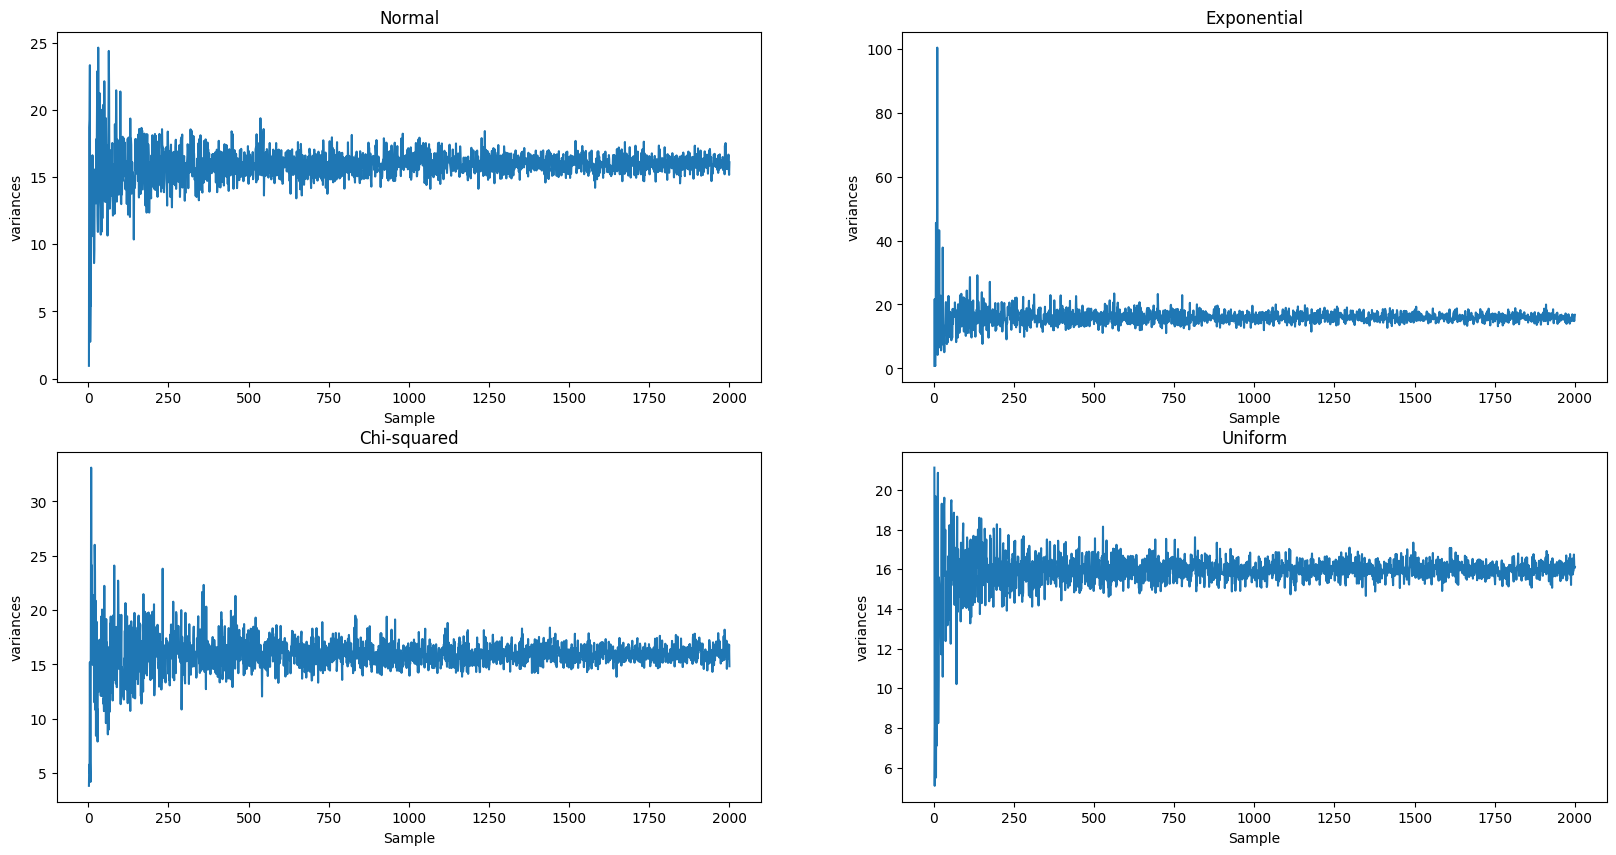

In [54]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))
draw(ax, 'variances')

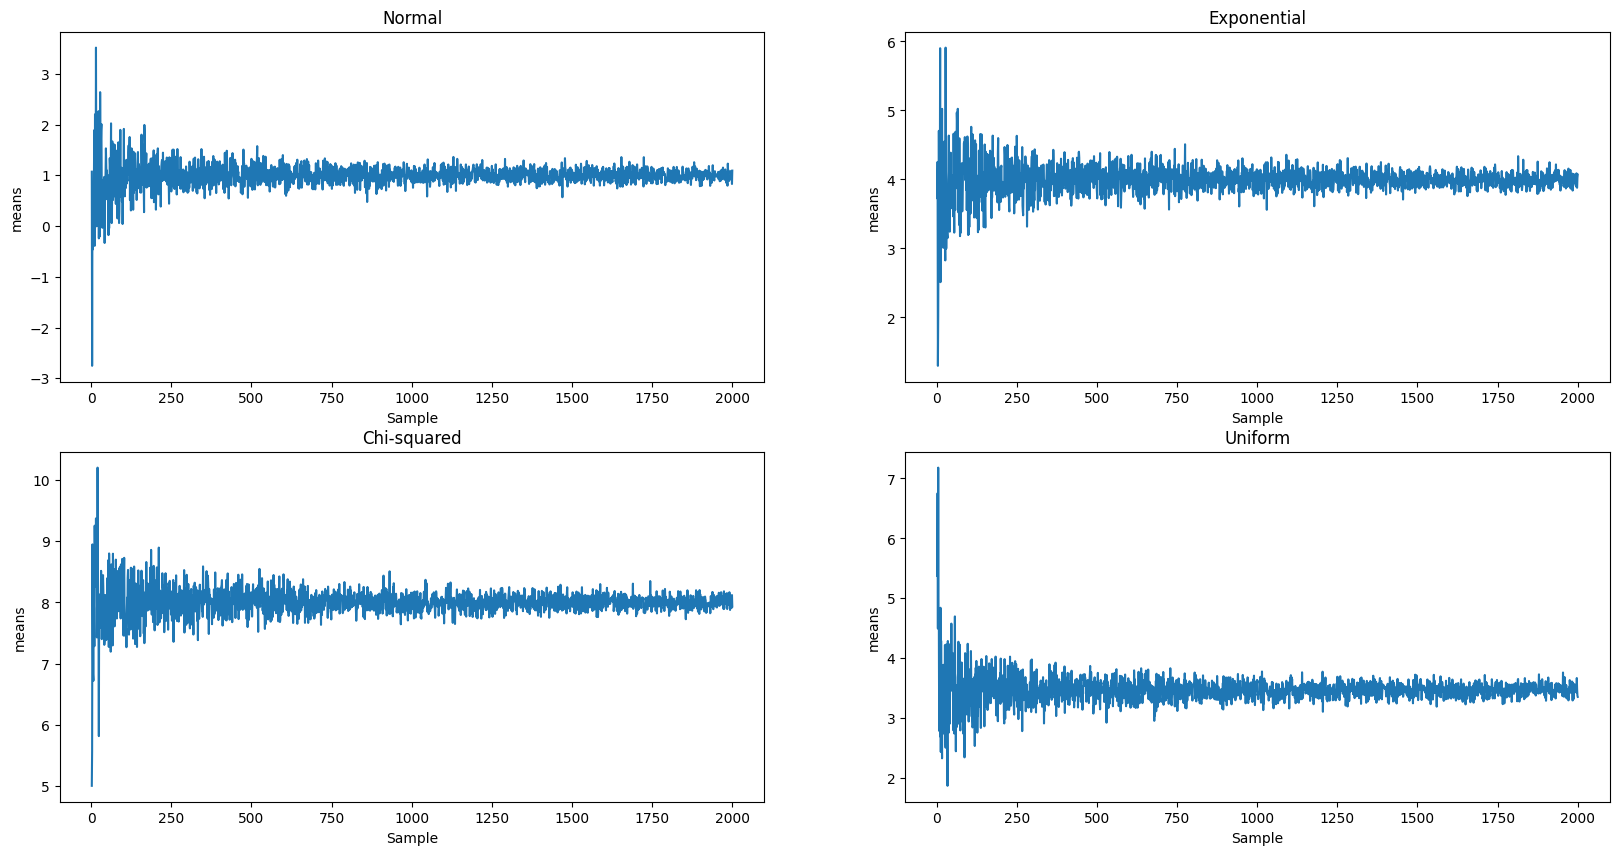

In [55]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))
draw(ax, 'means')

> Notes:
> - with an increasing number of samples, the sampled means and variances tend to converge towards the theoretical values. This convergence phenomenon is observable across all distributions.
> - for low sample sizes (around 0 to 500), both means and variances exhibit a tendency to deviate much more from the theoretical values.

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

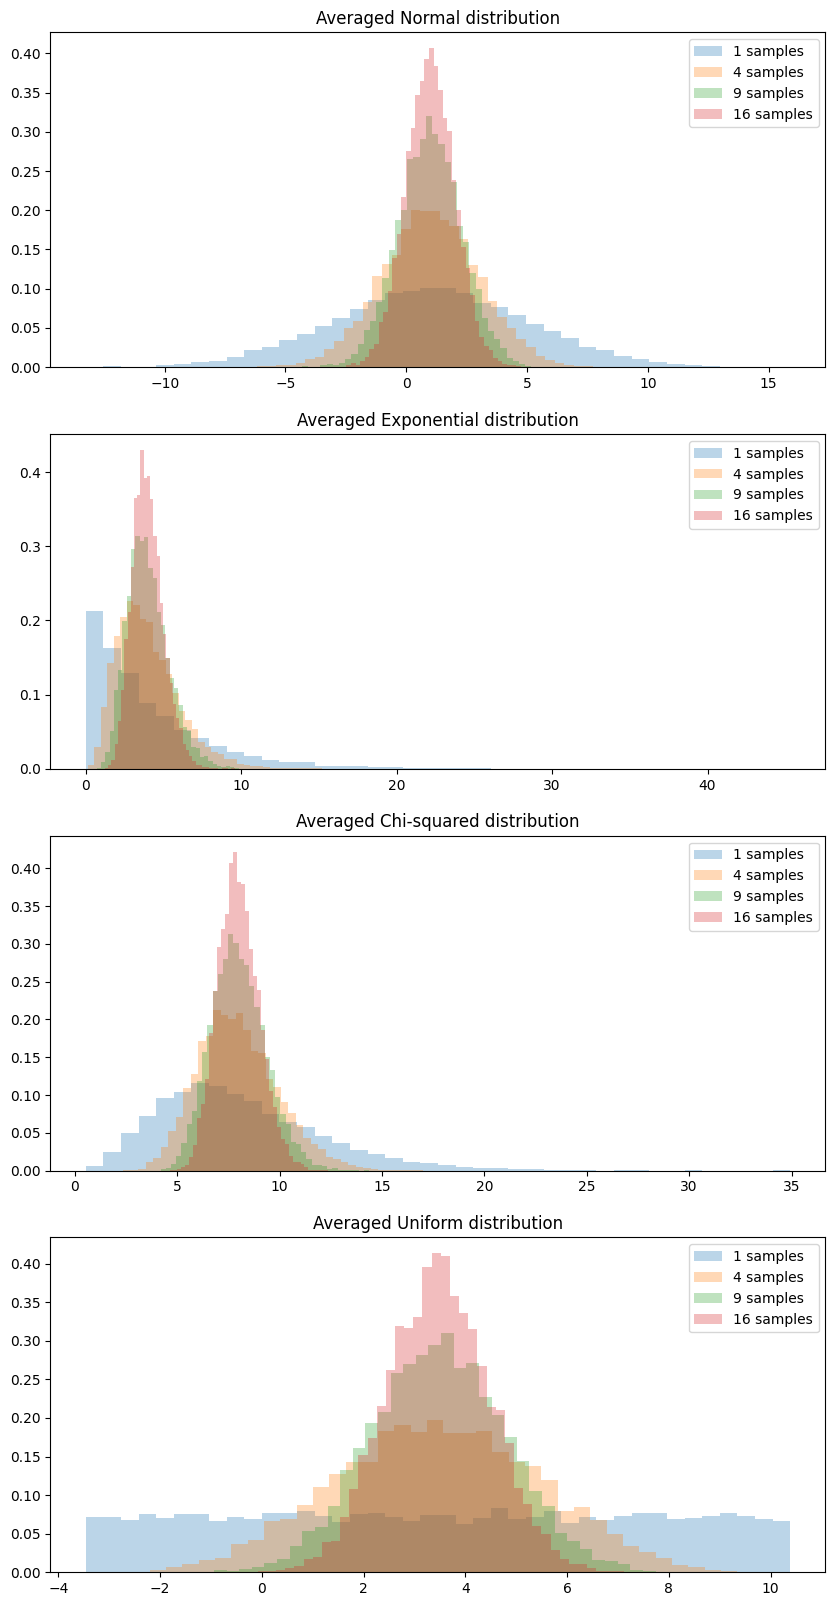

In [66]:
#here goes your code

fig, ax = plt.subplots(4, 1, figsize=(10, 20))

for i, dist, dist_name in zip(range(len(distribution_names)), distributions, distribution_names):
    for N in [1, 4, 9, 16]:
        x = [np.mean(dist.rvs(size=N)) for _ in range(10000)]
        ax[i].hist(x, density=True, bins=40, alpha=0.3, label=f"{N} samples")
    ax[i].set_title(f"Averaged {dist_name} distribution")
    ax[i].legend()


> Notes:
> - x-axis represents the average of the randomly generated samples of the given size (to get the average i took into an account `10.000` different samples per given size)
> - y-axis stands for density
> - as the sample size increases, the histogram becomes more tightly distributed around the true value of mean of the distribution.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

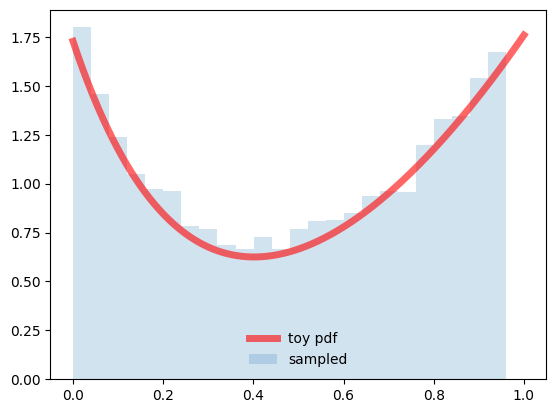

In [57]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    M = max(dist)
    samples = []
    for i in range(size):
        is_bigger = False
        while not is_bigger:
            t = uniform.rvs()
            u = uniform.rvs(loc=0, scale=M)
            if toy_dist(t) > u:
                is_bigger = True
                samples.append(t)
    return samples

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

> Notes:
> - `accept_rejection_sampling` function seems to be implemented correcty because the obtained samples are close to the theoritical line

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Text(0.5, 0.98, 'Version I')

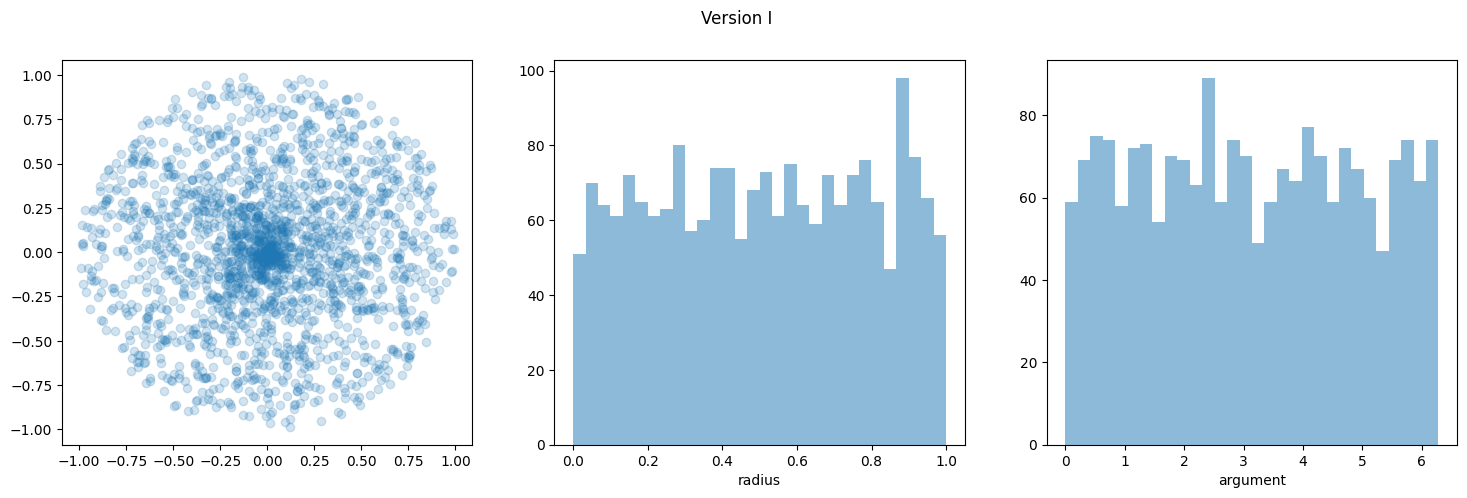

In [68]:
#Version1
#here goes your code
def get_samples (size = 2000):
    radius = uniform.rvs(loc = 0, scale=1, size=size)
    argument = uniform.rvs(loc = 0, scale= 2*np.pi, size=size)

    x = radius * np.cos(argument)
    y = radius * np.sin(argument)

    return x, y, radius, argument

x, y, radius, arguement = get_samples()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(x, y, alpha=0.2)
ax[1].hist(radius, bins = 30, alpha=0.5)
ax[1].set_xlabel('radius')
ax[2].hist(arguement, bins = 30, alpha=0.5)
ax[2].set_xlabel('argument')
fig.suptitle('Version I')

(array([24., 44., 57., 55., 62., 57., 59., 84., 73., 88., 89., 90., 78.,
        94., 78., 76., 92., 56., 89., 68., 81., 74., 71., 76., 69., 63.,
        47., 41., 42., 23.]),
 array([-0.99218262, -0.92584121, -0.85949981, -0.79315841, -0.72681701,
        -0.6604756 , -0.5941342 , -0.5277928 , -0.4614514 , -0.39510999,
        -0.32876859, -0.26242719, -0.19608579, -0.12974438, -0.06340298,
         0.00293842,  0.06927982,  0.13562122,  0.20196263,  0.26830403,
         0.33464543,  0.40098683,  0.46732824,  0.53366964,  0.60001104,
         0.66635244,  0.73269385,  0.79903525,  0.86537665,  0.93171805,
         0.99805946]),
 <BarContainer object of 30 artists>)

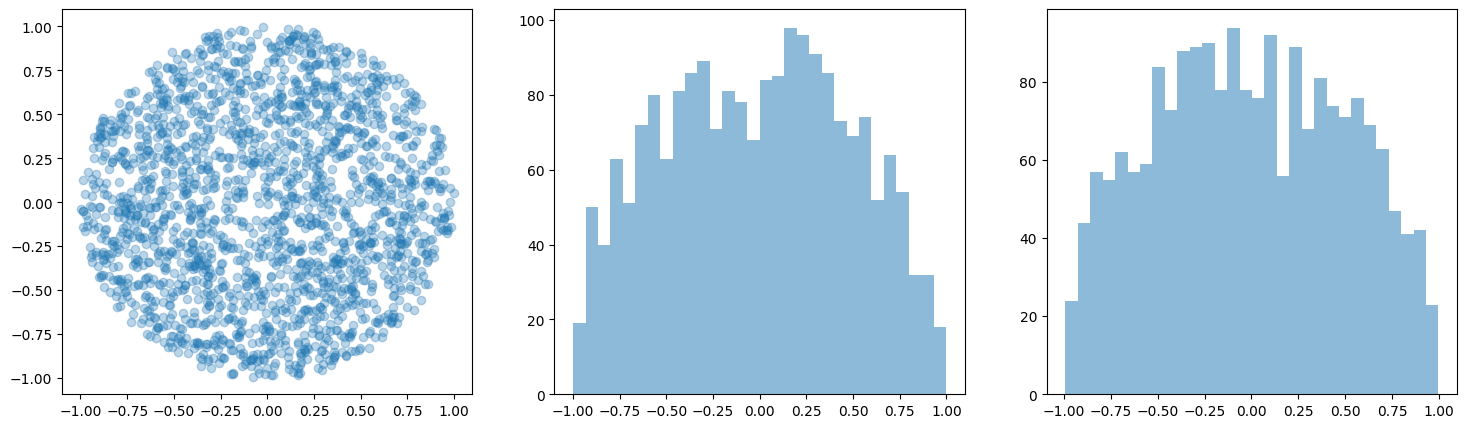

In [59]:
# Version II

def get_disk_points(size = 2000):
    dist = uniform(loc = -1, scale=2)
    disk_points_x, disk_points_y = [], []

    for i in range (size):
        is_in_range = False
        while not is_in_range:
            x, y = dist.rvs(size=1)[0], dist.rvs(size=1)[0]
            if sqrt(x*x + y*y) <=1:
                disk_points_x.append(x)
                disk_points_y.append(y)
                is_in_range = True
                
    return (disk_points_x, disk_points_y)

points_x, points_y = get_disk_points()

fig, ax = plt.subplots(1, 3, figsize=(18,5))
ax[0].scatter(points_x, points_y, alpha=0.3)
ax[1].hist(points_x, bins=30, alpha=0.5)
ax[2].hist(points_y, bins=30, alpha=0.5)

> Notes:
> - first distribution takes into the account the sape of the unit disk and both samples for radius and argument are closer to the theoritical unfirom distribution
> - in the second version, we initially obtain the points and subsequently select those that match the disk. This process influences the distribution of points along the x and y axes.

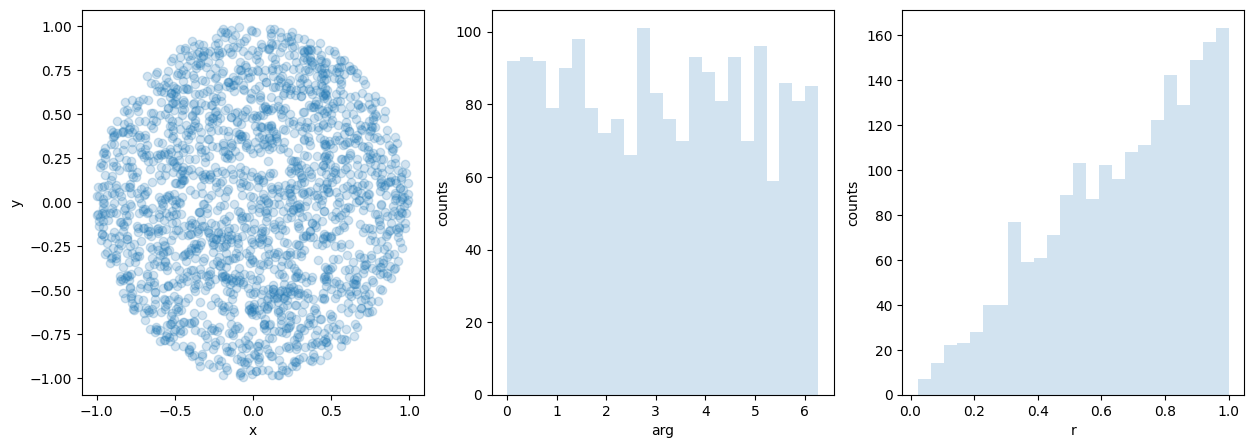

In [60]:
#Version3
#here goes your code

uniform_rad = uniform(0, 1)
radius = np.sqrt(1 - uniform_rad.rvs(size=2000))

uniform_arg = uniform(0, 2 * np.pi)
argument = uniform_arg.rvs(2000)

x = radius * np.sin(argument)
y = radius * np.cos(argument)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()


> Notes:
> - when we compute radius as `np.sqrt(1 - uniform_rad.rvs(size=2000))` it gives us in the result placements of points closer to the previous one

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [61]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

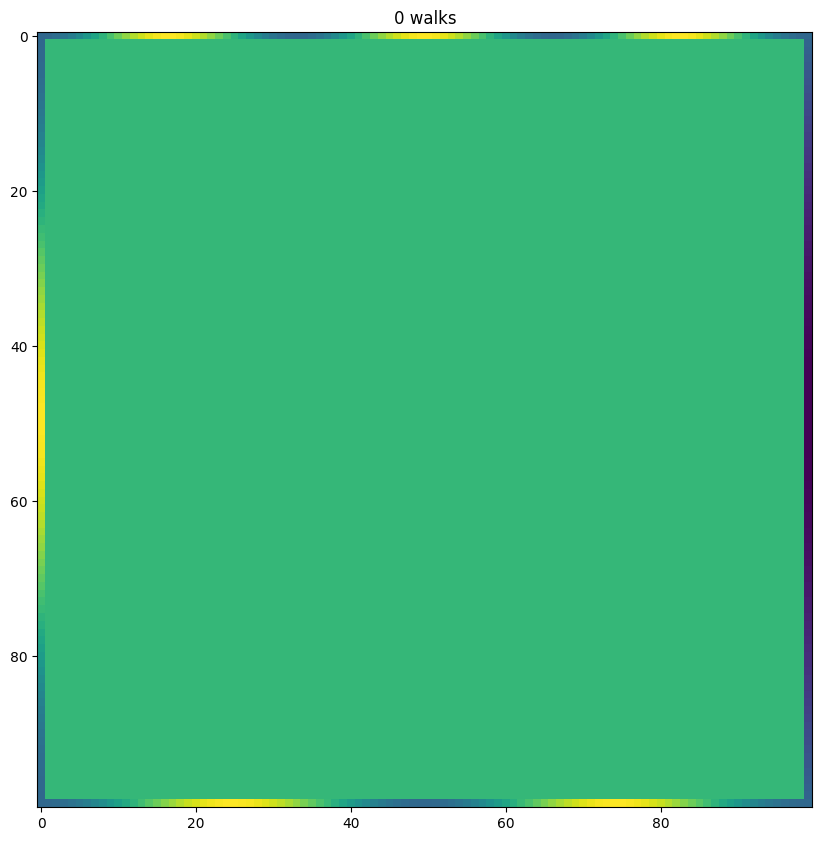

In [62]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

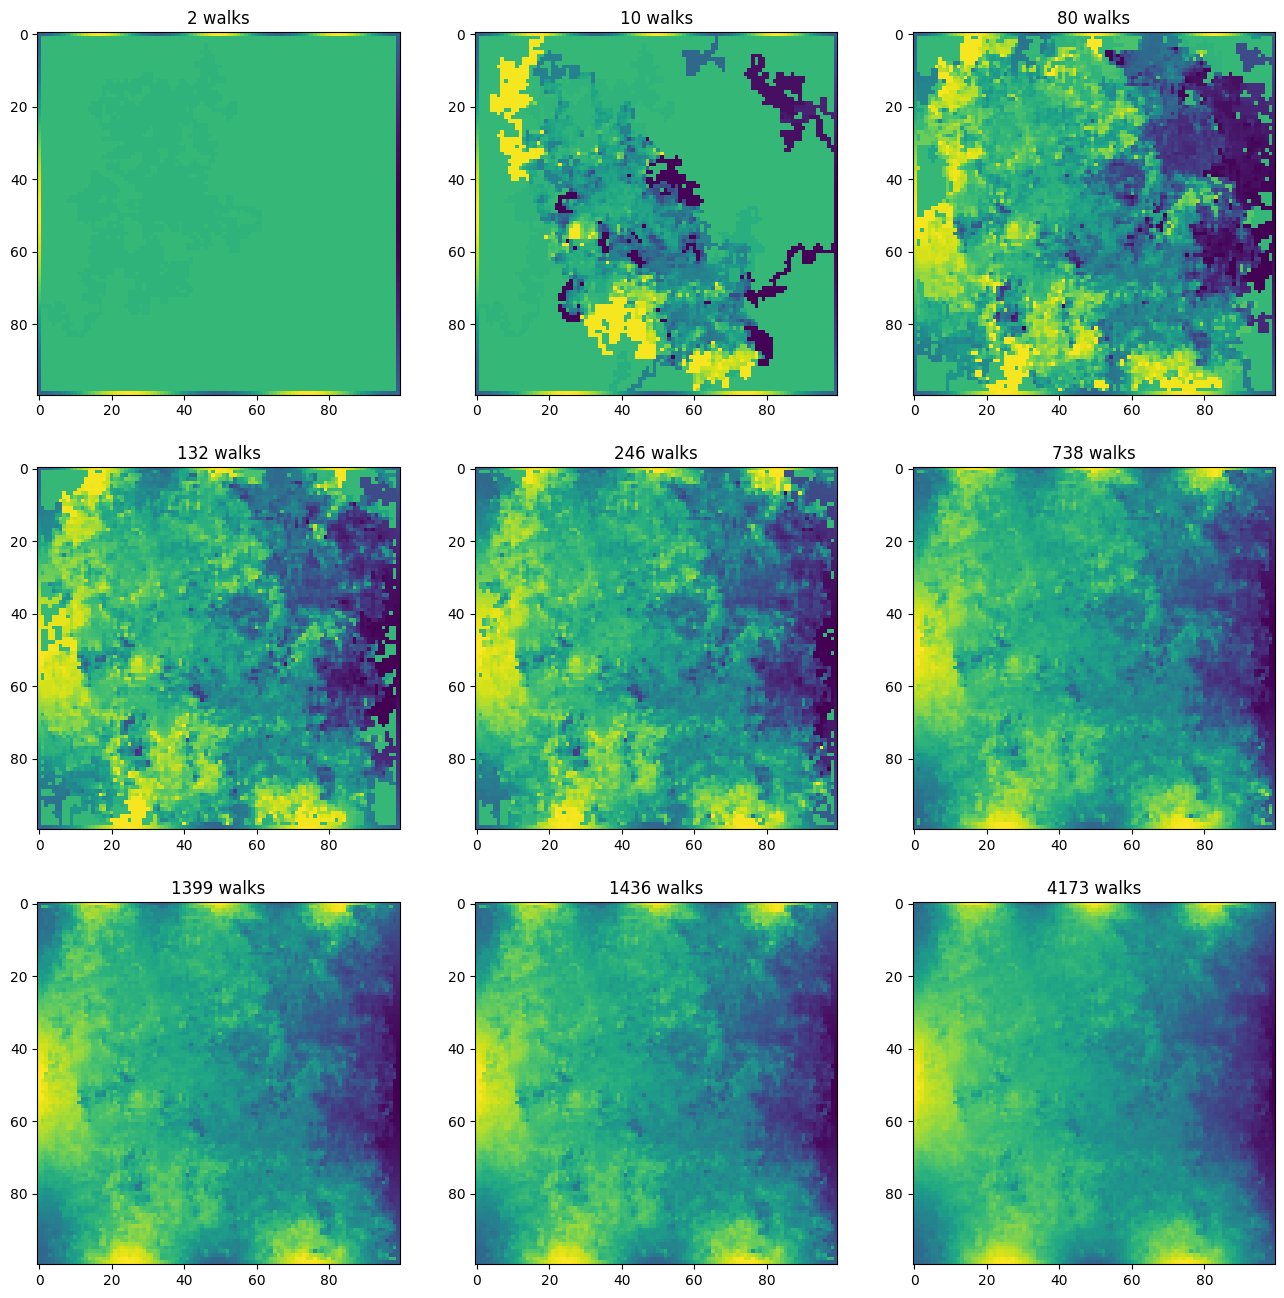

In [63]:
#here goes your code
import random
import copy

np.random.seed(0)

# Define possible move directions
move_directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
current_subplot_index = 0

# Initialize planes with a deep copy of the initial state
planes = [copy.deepcopy(plane)]

precision = 1e-7
relative_change_intervals = np.geomspace(precision, 1e-1, num=10, endpoint=True)[::-1]
intervals_iter = iter(relative_change_intervals)
current_interval = next(intervals_iter)

i = 0
while current_subplot_index < 9:
    i += 1
    start_x, start_y = np.random.randint(1, S - 1, 2)
    moves = []
    previous_plane_state = copy.deepcopy(plane_counts)

    # Simulate a random walk within the grid
    while all([start_x > 0, start_x < S - 1, start_y > 0, start_y < S - 1]):
        plane_counts[start_y][start_x] += 1
        moves.append([start_y, start_x])
        move_direction = random.choice(move_directions)
        start_x, start_y = start_x + move_direction[1], start_y + move_direction[0]

    # Update the planes based on the random walk
    planes.append(copy.deepcopy(planes[-1]))
    for move in moves:
        planes[-1][move[0]][move[1]] = (
            (previous_plane_state[move[0]][move[1]] * planes[-2][move[0]][move[1]])
            + planes[-1][start_y][start_x]
        ) / (previous_plane_state[move[0]][move[1]] + 1)

    # Calculate relative change and update the subplot accordingly
    relative_change = np.linalg.norm(planes[-1] - planes[-2]) / np.linalg.norm(planes[-1])
    if relative_change < precision * 1e-10:
        continue
    if relative_change <= current_interval:
        axs.flat[current_subplot_index].imshow(planes[-1])
        axs.flat[current_subplot_index].set_title(f'{len(planes)} walks')
        current_subplot_index += 1
        current_interval = next(intervals_iter)

plt.show()

> Notes:
> - the plot shows us how the plane changes with the increase of the number of walks